## Blockchain

In [42]:
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# df['data'] = df['data'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

# Merging in-chain Dataframe

In [9]:
import os
data_path = '../raw_data'
dateparse = lambda x: pd.Timestamp(x).strftime('%Y-%m-%d')

d = {}
lis = []

for filename in os.listdir('../raw_data'):
    if filename.endswith(".csv"): 
        filename_ = filename.replace('.csv','')
        lis.append(filename_)
        d[filename_] = pd.read_csv(os.path.join(data_path, filename),
                             parse_dates=['Timestamp'], date_parser= dateparse, 
                             index_col='Timestamp')


In [10]:
df_describe =pd.DataFrame()

for k, v in d.items():
    df_ = d[k].describe()
    df_describe = pd.concat([df_describe, df_],axis=1)
    

In [14]:
import pickle
with open('saved_dictionary.pkl', 'wb') as f:
    pickle.dump(d, f)

In [15]:
with open('saved_dictionary.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)

## Glassnode

    - api keys
    21JXvnWb8iqfgMs4c1RInHqiy0s

In [16]:
import json
import requests
import pandas as pd
# insert your API key here
API_KEY = '21JXvnWb8iqfgMs4c1RInHqiy0s'
# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count',
    params={'a': 'BTC', 'api_key': API_KEY})
# convert to pandas dataframe
df_active_add = pd.read_json(res.text, convert_dates=['t'])


In [66]:
P = [
    {
        "path": "/v1/metrics/addresses/count",
      "assets": [{"symbol": "BTC",
                "name": "Bitcoin",
                "isERC20": False,
                "isStablecoin": False,
                "exchanges": ["aggregated","binance"]}],
      "currencies": ["NATIVE"],
      "resolutions": ["24h"],
      "formats": ["CSV"]
     }
    ]


In [68]:
import time

time.time()

1637929877.054941

### ADDRESS API

In [141]:
list_addresses = ['sending_to_exchanges_count',
                  'receiving_from_exchanges_count',
                  'count','sending_count','receiving_count',
                  'active_count','new_non_zero_count',
                  'accumulation_count','accumulation_balance',
                  'min_point_zero_1_count','min_1_count',
                  'min_10_count','min_100_count','min_1k_count',
                 'profit_relative','min_1m_usd_count']


In [167]:
API_KEY = '21JXvnWb8iqfgMs4c1RInHqiy0s'
# make API request
ls = []
for i in list_addresses:
    res = requests.get(f'https://api.glassnode.com/v1/metrics/addresses/{i}',
        params={'a': 'BTC',
                'api_key': API_KEY})
    
    if res.ok:
        df_temp = pd.read_json(res.text, convert_dates=['t'])
        df_temp.columns = ['date', i]
        ls.append(df_temp)
    else:
        ls.append('')

In [179]:
ls_new = [x for x in ls if len(x)!=0]
reset_df = pd.concat(ls_new,axis=0)
addresses_df = reset_df.groupby("date").mean()

In [235]:
addresses_df

,count,sending_count,receiving_count,active_count,new_non_zero_count,min_point_zero_1_count,min_1_count,min_10_count,min_100_count,min_1k_count
date,,,,,,,,,,
2009-01-03,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2009-01-04,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2009-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2009-01-06,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2009-01-07,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-21,905267890.0,543592.0,586289.0,852963.0,377997.0,NaN,NaN,NaN,NaN,NaN
2021-11-22,905701634.0,572842.0,676630.0,923541.0,433744.0,NaN,NaN,NaN,NaN,NaN
2021-11-23,906158240.0,535121.0,700994.0,912653.0,456606.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

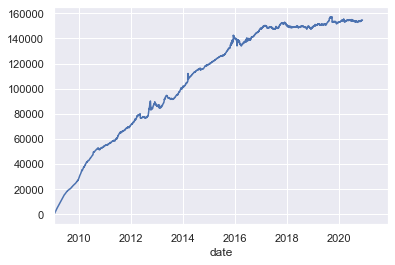

In [211]:
addresses_df['min_10_count'].plot()

### Blockchain API

In [180]:
list_blockchain = ['utxo_count',
       'utxo_created_count',
       'utxo_spent_count',
       'utxo_created_value_sum',
       'utxo_created_value_mean',
       'utxo_profit_count',
       'utxo_loss_count',
       'utxo_profit_relative',
       'block_size_mean',
       ]

In [181]:
API_KEY = '21JXvnWb8iqfgMs4c1RInHqiy0s'
# make API request
ls = []
for i in list_blockchain:
    res = requests.get(f'https://api.glassnode.com/v1/metrics/blockchain/{i}',
        params={'a': 'BTC',
                'api_key': API_KEY})
    
    if res.ok:
        df_temp = pd.read_json(res.text, convert_dates=['t'])
        df_temp.columns = ['date', i]
        ls.append(df_temp)
    else:
        ls.append('')

In [183]:
ls_new = [x for x in ls if len(x)!=0]
reset_df = pd.concat(ls_new,axis=0)
blockchain_df = reset_df.groupby("date").mean()

In [220]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
pd.DataFrame(imputer.fit_transform(blockchain_df)).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710 entries, 0 to 4709
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4710 non-null   float64
 1   1       4710 non-null   float64
 2   2       4710 non-null   float64
 3   3       4710 non-null   float64
 4   4       4710 non-null   float64
 5   5       4710 non-null   float64
 6   6       4710 non-null   float64
 7   7       4710 non-null   float64
dtypes: float64(8)
memory usage: 294.5 KB


<AxesSubplot:xlabel='date'>

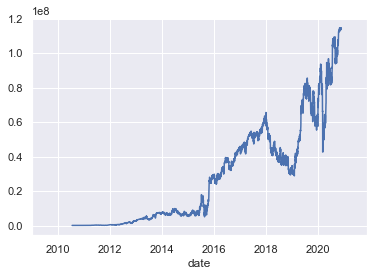

In [212]:
blockchain_df['utxo_profit_count'].plot()

# Create whole Data set

In [ ]:
#import pandas as pd
#from functools import reduce

# compile the list of dataframes you want to merge
#data_frames = [loaded_dict[k] for k,v in loaded_dict.items()]
#df_merged = reduce(lambda  left, right: pd.merge(left,right,on=['Timestamp'],
#                                            how='outer'), data_frames)

In [18]:
df_active_add.columns = ['Timestamp','active_account']

In [19]:
final_df_2016 = pd.concat([final_df.reset_index(), df_active_add]
         ).groupby("Timestamp").mean().interpolate(method='linear',axis=0).loc['2016':]


In [26]:
final_df_2016.to_csv('final_df_2016.csv',index=True)

In [29]:
pd.read_csv(os.path.join('final_df_2016.csv'), index_col=0 ,parse_dates=True)


,n-transactions-per-block,difficulty,utxo-count,mvrv,nvt,avg-block-size,n-transactions-excluding-popular,n-unique-addresses,median-confirmation-time,n-payments,...,mempool-growth,mempool-size,blocks-size,hash-rate,n-transactions-total,n-payments-per-block,avg-confirmation-time,nvts,transaction-fees-usd,active_account
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1041.690770,1.038803e+11,3.338612e+07,1.438947,13.175163,0.571189,151110.666667,263121.000000,7.333333,NaN,...,NaN,NaN,54592.003253,7.705155e+05,1.011267e+08,NaN,NaN,6.430930,13896.175481,316489.0
2016-01-02,1027.848276,1.038803e+11,3.343719e+07,1.435261,14.288515,0.579744,146859.333333,290170.000000,7.233333,NaN,...,NaN,NaN,54670.707780,7.601179e+05,1.012783e+08,NaN,NaN,6.406957,13798.467773,419389.0
2016-01-03,1072.431759,1.038803e+11,3.348825e+07,1.431575,15.401867,0.600422,142608.000000,317219.000000,7.133333,NaN,...,NaN,NaN,54759.271865,7.497203e+05,1.014362e+08,NaN,NaN,6.382985,13975.989027,394047.0
2016-01-04,1117.015243,1.038803e+11,3.353932e+07,1.427888,16.515219,0.621101,152435.333333,344268.000000,7.905556,NaN,...,NaN,NaN,54847.835949,7.393227e+05,1.015941e+08,NaN,NaN,6.359013,14153.510280,418253.0
2016-01-05,1161.598726,1.038803e+11,3.353985e+07,1.427604,13.651511,0.641779,162262.666667,350924.000000,8.677778,NaN,...,NaN,NaN,54936.400034,7.483729e+05,1.017520e+08,NaN,NaN,6.361890,14331.031533,434786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,2054.611695,2.267415e+13,7.682603e+07,2.437422,2.814664,1.270386,275592.333333,725020.000000,7.297222,695747.0,...,1412.433333,4905390.0,375623.175341,1.671497e+08,6.877094e+08,4831.576389,17.654845,4.914937,771114.080949,983663.0
2021-11-19,2078.240876,2.267415e+13,7.692242e+07,2.423386,3.531133,1.275837,262180.666667,678741.666667,7.027778,689992.0,...,1606.650000,2925761.5,375815.154429,1.667887e+08,6.880043e+08,5036.437956,18.174117,4.835233,757058.299599,968315.0
2021-11-20,2078.240876,2.267415e+13,7.701882e+07,2.409351,4.247603,1.275837,248769.000000,632463.333333,6.758333,623208.0,...,725.850000,946133.0,375815.154429,1.664277e+08,6.880043e+08,4297.986207,18.693389,4.755529,757058.299599,857699.0


# Target

In [30]:
data_path = '../raw_data/additional'
coinbase_v = pd.read_csv(os.path.join(data_path, 'coinbase_2014-2021.csv'), index_col=0 ,parse_dates=True)

In [31]:
data_path = '../raw_data/additional'
BTC_v = pd.read_csv(os.path.join(data_path, 'trade-volume.csv'), index_col=0 ,parse_dates=True)


## EDA

In [32]:
final_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2153 entries, 2016-01-01 to 2021-11-22
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   n-transactions-per-block          2153 non-null   float64
 1   difficulty                        2153 non-null   float64
 2   utxo-count                        2153 non-null   float64
 3   mvrv                              2153 non-null   float64
 4   nvt                               2153 non-null   float64
 5   avg-block-size                    2153 non-null   float64
 6   n-transactions-excluding-popular  2153 non-null   float64
 7   n-unique-addresses                2153 non-null   float64
 8   median-confirmation-time          2153 non-null   float64
 9   n-payments                        1422 non-null   float64
 10  miners-revenue                    2153 non-null   float64
 11  mempool-growth                    1991 non-null   f

In [33]:
df = final_df_2016.drop(columns=['n-payments-per-block','n-payments']).dropna()


In [34]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler,RobustScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings

In [ ]:
#creating new dataframe for scaled feature values by first copying the original dataframe
df_features_scaled = df.copy()

#substituting unscaled feature values by scaled values using sklearn StandardScaler
scaler = RobustScaler()
df_features_scaled.iloc[:,:] = scaler.fit_transform(df_features_scaled.iloc[:,:])

#drawing figure with title and single axis. Size and resolution are specified
plt.figure(figsize=(18,6),dpi=600);
plt.title('Comparison of scaled features',fontsize=22);

#setting y axis label
plt.ylabel('Scaled values');

#rotating x axis ticks by 90 degrees
plt.xticks(rotation=90);

#drawing boxplot of scaled feature values
sns.boxplot(data=df_features_scaled);
    

In [ ]:
#creating new dataframe for scaled feature values by first copying the original dataframe
df_features_scaled = df.copy()

#substituting unscaled feature values by scaled values using sklearn StandardScaler
scaler = StandardScaler()
df_features_scaled.iloc[:,:] = scaler.fit_transform(df_features_scaled.iloc[:,:])

#drawing figure with title and single axis. Size and resolution are specified
plt.figure(figsize=(18,6),dpi=600);
plt.title('Comparison of scaled features',fontsize=22);

#setting y axis label
plt.ylabel('Scaled values');

#rotating x axis ticks by 90 degrees
plt.xticks(rotation=90);

#drawing boxplot of scaled feature values
sns.boxplot(data=df_features_scaled);


In [35]:
target = coinbase_v.loc['2016-06-14':][['volume_gross']]

In [36]:
target_week = target.resample('w').mean()

In [37]:
df_week = df.resample('w').mean()
scaler = StandardScaler()
df_week_scaled = pd.DataFrame(scaler.fit_transform(df_week),
                             columns=df_week.columns,
                             index= df_week.index)


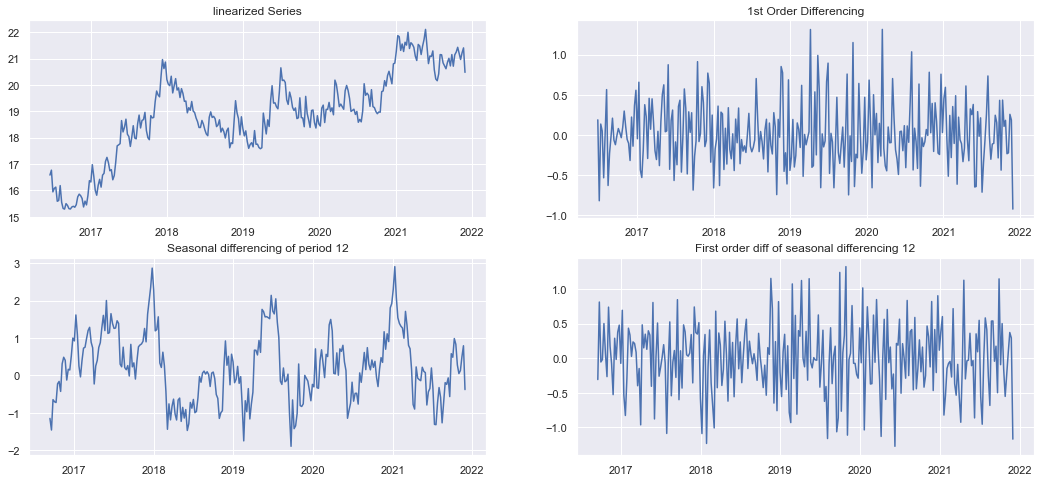

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(18,8))
# keeping just log transform to stay ~ linear
target_week['log'] = np.log(target_week.values)

# linearized series
axs[0,0].plot(target_week.log); axs[0,0].set_title('linearized Series')

# Normal differencing
axs[0,1].plot(target_week.log.diff(1)); axs[0,1].set_title('1st Order Differencing')

# Seasonal differencing
axs[1,0].plot(target_week.log.diff(12))
axs[1,0].set_title('Seasonal differencing of period 12')

# Sesonal + Normal differencing
axs[1,1].plot(target_week.log.diff(12).diff(1))
axs[1,1].set_title('First order diff of seasonal differencing 12');

        

        
        

In [39]:
int(len(df_week_scaled)/2)
target_week.columns

Index(['volume_gross', 'log'], dtype='object')

In [40]:
X_train = df_week_scaled.iloc[:142,:]
X_test = df_week_scaled.iloc[142:,:]

target_week = target.resample('w').mean()

y_train = target_week.iloc[:142,:]
y_test = target_week.iloc[142:,:]

In [41]:
# Auto-fit the best SARIMAX with help from this exogenous time series
import pmdarima as pm
sarimax = pm.auto_arima(y_train, exogenous=X_train,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=5221.542, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5228.708, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5201.489, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5203.297, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5730.506, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5218.041, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5197.895, Time=1.03 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=5194.643, Time=1.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=5192.645, Time=0.59 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=5190.684, Time=0.43 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=5192.606, Time=1.16 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=5190.584, Time=0.53 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=5219.952, Time=0.15 sec
 ARIMA(2,0,0)(1,1,1)[12]

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build Model
sarima = SARIMAX(train, order=(2, 0, 1),seasonal_order=(0,1,2,12))
sarima = sarima.fit()

# Forecast
results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

Name: pmdarima
Version: 1.8.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /Users/michelangelodalessandro/.pyenv/versions/3.8.12/envs/btc_sent_fc/lib/python3.8/site-packages
Requires: Cython, joblib, numpy, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


In [226]:
'Wagon'[::-1]

'nogaW'

In [ ]:
''.join(a)